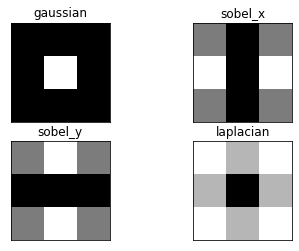

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# Define gaussian, sobel, and laplacian (edge) filters

gaussian = (1/9)*np.array([[1, 1, 1],
                           [1, 1, 1],
                           [1, 1, 1]])

sobel_x= np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])

sobel_y= np.array([[-1,-2,-1],
                   [0, 0, 0],
                   [1, 2, 1]])

# laplacian, edge filter
laplacian=np.array([[0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]])

filters = [gaussian, sobel_x, sobel_y, laplacian]
filter_name = ['gaussian','sobel_x', \
                'sobel_y', 'laplacian']


# perform a fast fourier transform on each filter
# and create a scaled, frequency transform image
f_filters = [np.fft.fft2(x) for x in filters]
fshift = [np.fft.fftshift(y) for y in f_filters]
frequency_tx = [np.log(np.abs(z)+1) for z in fshift]

# display 4 filters
for i in range(len(filters)):
    plt.subplot(2,2,i+1),plt.imshow(frequency_tx[i],cmap = 'gray')
    plt.title(filter_name[i]), plt.xticks([]), plt.yticks([])

plt.show()

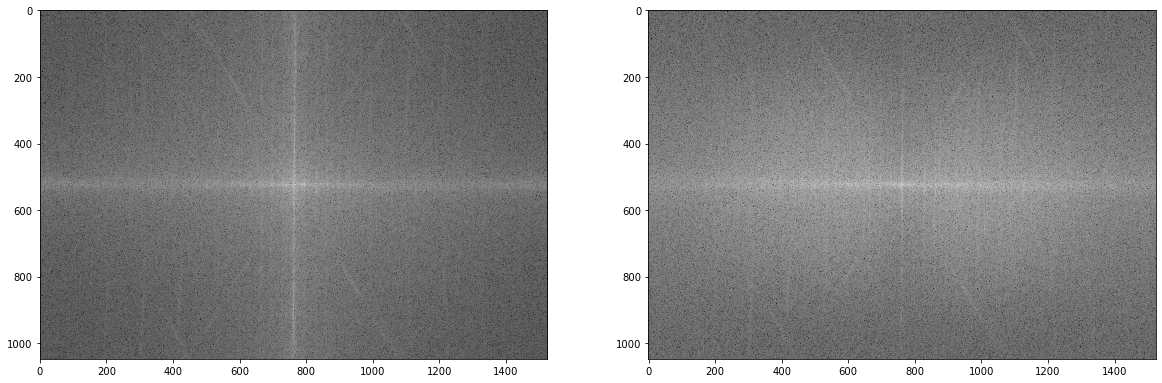

In [2]:
image = cv2.imread('images/city_hall.jpg')
gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
filtered_im = cv2.filter2D(gray_image,-1,sobel_x)
#Apply ft to filtered image and original image
def ft_image(norm_image):
    '''This function takes a normalized, grayscale image
    and returns a frequency spectrum transform of that image'''
    f = np.fft.fft2(norm_image)
    fshift = np.fft.fftshift(f)
    frequency_spectrum = 20*np.log(np.abs(fshift))
    
    return frequency_spectrum
ft_original = ft_image(gray_image)
ft_filtered = ft_image(filtered_im)

f, (ax1,ax2) = plt.subplots(1,2,figsize=(20,10))
ax1.imshow(ft_original,cmap='gray')
ax2.imshow(ft_filtered,cmap='gray')


In [ ]:
#canny edge detection
